# Word Count Prototype
This notebook presents a prototype of our word count experiment example. It calls our `cdstemplate` library directly, to avoid reduplicating code, then creates a plot of the most frequent words in the corpus. Notebooks are a great way to create visualizations, which often need to be tweaked for readability and aesthetics. 

Don't forget to restart your kernel and re-run the notebook completely before you commit or share it with others! This helps avoid problems arising from deleted or reordered cells.

In [1]:
# This cell imports packages and defines any experimental set-up
# Try to make experimental parameters easy for others to to find by including them in a few cells at the beginning of your notebook
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

from cdstemplate import word_count, stopword_list

# You can include this to see log messages from the packages you're using
logging.basicConfig(level=logging.INFO)

# A relative path to the input data
input_txt_dir = "../data/gutenberg"

In [2]:
# Add counts for each document
corpus_counter = word_count.CorpusCounter()
for txt_file in Path(input_txt_dir).glob("*.txt"):
    print("Tokenizing file:", txt_file)
    txt_contents = txt_file.read_text()
    corpus_counter.add_doc(txt_contents)

INFO:cdstemplate.word_count:Adding 182 token(s) case insensitively
INFO:cdstemplate.word_count:Vocabulary size increased by 115 word types
INFO:cdstemplate.word_count:Adding 181 token(s) case insensitively
INFO:cdstemplate.word_count:Vocabulary size increased by 105 word types
INFO:cdstemplate.word_count:Adding 180 token(s) case insensitively
INFO:cdstemplate.word_count:Vocabulary size increased by 80 word types
INFO:cdstemplate.word_count:Adding 204 token(s) case insensitively
INFO:cdstemplate.word_count:Vocabulary size increased by 71 word types
INFO:cdstemplate.word_count:Adding 258 token(s) case insensitively
INFO:cdstemplate.word_count:Vocabulary size increased by 92 word types
INFO:cdstemplate.word_count:Adding 246 token(s) case insensitively
INFO:cdstemplate.word_count:Vocabulary size increased by 81 word types
INFO:cdstemplate.word_count:Adding 189 token(s) case insensitively
INFO:cdstemplate.word_count:Vocabulary size increased by 88 word types
INFO:cdstemplate.word_count:Addi

Tokenizing file: ..\data\gutenberg\austen-emma.txt
Tokenizing file: ..\data\gutenberg\austen-persuasion.txt
Tokenizing file: ..\data\gutenberg\austen-sense.txt
Tokenizing file: ..\data\gutenberg\bible-kjv.txt
Tokenizing file: ..\data\gutenberg\blake-poems.txt
Tokenizing file: ..\data\gutenberg\bryant-stories.txt
Tokenizing file: ..\data\gutenberg\burgess-busterbrown.txt
Tokenizing file: ..\data\gutenberg\carroll-alice.txt
Tokenizing file: ..\data\gutenberg\chesterton-ball.txt
Tokenizing file: ..\data\gutenberg\chesterton-brown.txt
Tokenizing file: ..\data\gutenberg\chesterton-thursday.txt


In [3]:
# How many unique words appeared in our corpus?
print("Vocab size:", corpus_counter.get_vocab_size())

Vocab size: 949


In [4]:
# Get the dataframe we'll work with for the display
word_count_df = corpus_counter.get_token_counts_as_dataframe()
display(word_count_df.head())

,token,count
410,"""Drop",1
190,"""ELLIOT",1
622,"""I",1
523,"""It's",2
531,"""No,",1


In [5]:
# We only want to include to top 100 most frequent words in our plot
top_words_df = word_count_df.sort_values("count", ascending=False).head(100)
display(top_words_df)

,token,count
25,the,127
24,of,72
12,and,62
15,a,43
21,to,38
...,...,...
411,thy,3
451,shall,3
332,Let,3
387,songs,3


Text(0.5, 1.0, 'Top 100 Most Frequent Words in a Subset of Project Gutenberg Texts')

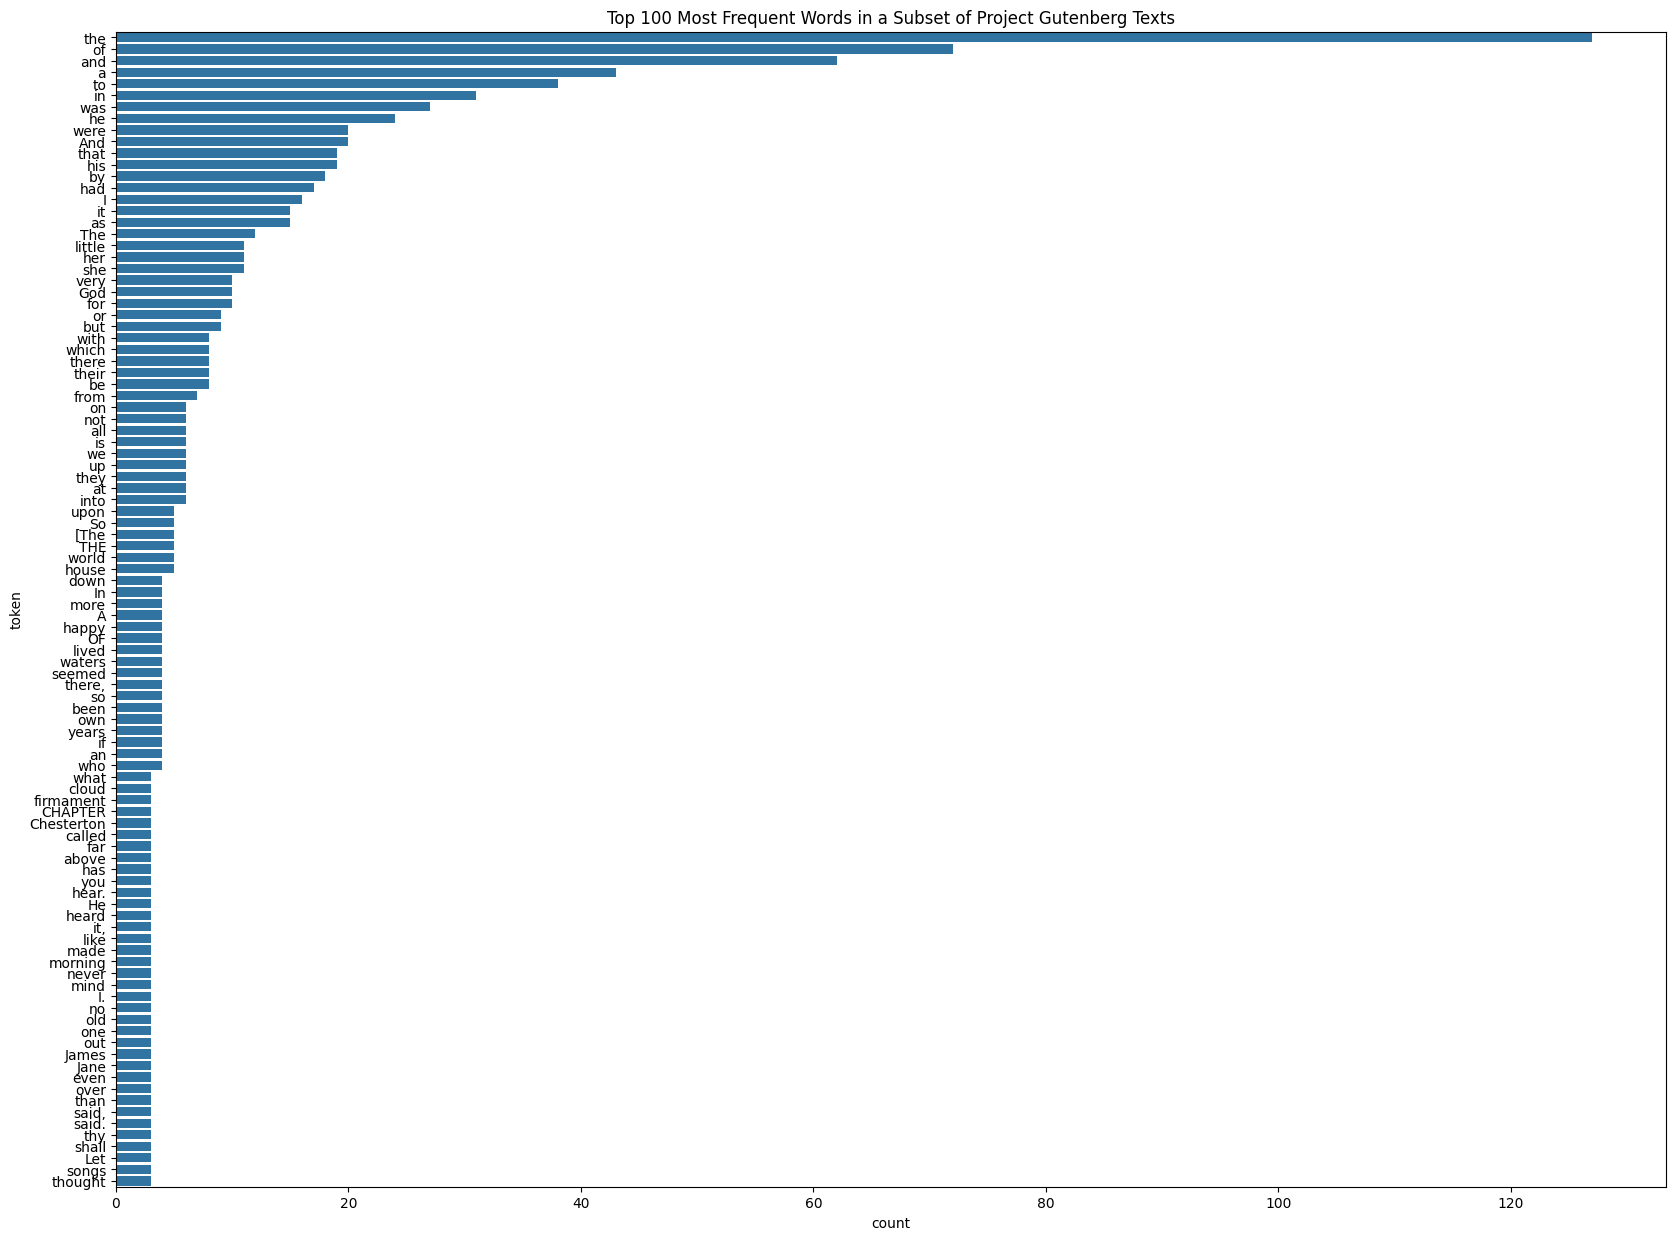

In [6]:
# Make the plot and customize how it is displayed
plt.figure(figsize=(20, 15))
fig = sns.barplot(data=top_words_df, x="count", y="token")
fig.set_title("Top 100 Most Frequent Words in a Subset of Project Gutenberg Texts")

In [13]:
# Adding a stopword list using nltk library

# Importing the libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Downloading the stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Default Stopwords
default_stopwords = set(stopwords.words('english'))
print(f"Default Stopwords: {len(default_stopwords)} words")

# Print the stopwords as a sorted list
print("List of NLTK English Stopwords:")
print(sorted(default_stopwords))

Default Stopwords: 198 words
List of NLTK English Stopwords:
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'o

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\debar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\debar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\debar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
